# Project 7: Working with Personal Data

Name: Kaleo Toguchi-Tani & Catelyn Clevenger

***

## Part 0: Setting up a GitHub repository

We start off this project by creating a GitHub repo, linked below which is shared with both partners, and made public so that Professor Wifs-Brock can access it.

https://github.com/kaleoeoeo/CS215_Project7

***

This is a Google Collab notebook, meaning we need to link our collab notebook to our Google drive.

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part 1: Extracting timestamps from your personal data (Kaleo)


I need to extract timestamps from my personal data! I'll start off by importing pandas and json, since my personal data file is in a .json format. Luckily, things aren't too complicated ot move over from .json to .csv format. **I personally don't mind having anyone see this data, which is why I don't have anything commented out.**

In [68]:
import pandas as pd
import json

In [67]:
mysteryKaleo = pd.read_json('/content/drive/MyDrive/CS215_Project7/StreamingHistory_music_3.json')

In [69]:
#We want to view our loaded in data frame so let's check by viewing the first couple of rows of our data
mysteryKaleo.head()

,endTime,artistName,trackName,msPlayed
0,2025-03-15 02:10,Natasha Bedingfield,Pocketful of Sunshine,4270
1,2025-03-15 02:10,Ludo,Love Me Dead,2590
2,2025-03-15 02:10,Holy Fuck,Tom Tom,42370
3,2025-03-15 02:11,AC/DC,Dirty Deeds Done Dirt Cheap,2030
4,2025-03-15 02:11,BABYMETAL,Gimme Chocolate!!,3700


In [70]:
#Extracting only the "time_stamps", which in this case is the endTime into a new dataframe
mysteryKaleo_timestamps = mysteryKaleo[['endTime']]

In [72]:
mysteryKaleo_timestamps.columns = ['timestamp']

In [71]:
#We want to see if we meet enough data points (more than 25 timestamps)
print("Number of timestamps:", len(mysteryKaleo_timestamps))

Number of timestamps: 1441


In [73]:
#Viewing the first couple rows in the dataframe, ensuring that we only have the timestamps within our dataframe
mysteryKaleo_timestamps.head()

,timestamp
0,2025-03-15 02:10
1,2025-03-15 02:10
2,2025-03-15 02:10
3,2025-03-15 02:11
4,2025-03-15 02:11


In [74]:
#mysteryTimestamps.to_csv('mysteryKaleo_timestamps.csv.csv', index=False)

Great! Now I can hand off this data to Catelyn for her to analyze to try and figure out where it came from.

## Part 1: Extracting timestamps from your personal data (Catelyn)

## **Goal**: I wish to turn my subscriber info from my personal Google account (specifically my IP activity) into a mystery CSV  that only has time stamps.  My subscriber info is stored as an HTML file, so I will need to use BeautifulSoup to work with it.

### **Note**: Since I am working with personal data, I have removed some of Part 1's code.  I will comment out code that no longer works and indicate parts I removed with underscores (________).

In [ ]:
#First, I will import the necessary packages for:

# creating, analyzing, and plotting dataframes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#web scraping
import requests
from bs4 import BeautifulSoup

In [ ]:
# google_html stores the url for the calendar page
#with open("__________", "r", encoding="utf-8") as file:
    #google_html = file.read()

In [ ]:
# BeautifulSoup turns html into soup

#google_soup = BeautifulSoup(google_html, 'html.parser')

In [ ]:
# find_all('td') collects all values stored in my IP activity table (from all rows and columns)
table = google_soup.find_all('td')

In [ ]:
# The 'Timestamp' column's values can be found starting at index 0 and indexes increasing by increments of 8
print(table[0])
print(table[8])
print(table[16])
print(table[24])
print(table[32])

In [ ]:
#There are 1448 values stored in the IP activity table
print(type(table))
print(len(table))

In [ ]:
# There are 181 timestamp values stored in the IP activity table.
timestamps = [table[i].text for i in range(0, len(table), 8)]
print(len(timestamps))


In [ ]:
# I will create a one column dataframe to store the timestamps.
df = pd.DataFrame({'time_stamp': timestamps})

In [ ]:
print(df.head())
print(df.tail())

In [ ]:
# Finally, I will convert df to a csv to send to Kaleo.
df.to_csv('Catelyn_Mystery_Timestamp.csv')

***

## Part 2: Analyzing timestamp data for patterns (Kaleo)

### 1) Make sure the timestamp is in the datetime format (for example, by using pandas.to_datetime.)

Now that I have Catelyn's data, which I define as a variable "mysteryCatelyn", I now have the job to figure out where it came from. The first thing I'll need to do is import pandas, matplotlib (for visualizations), and numpy for calculations. Then I'll need to ensure that the time stamp is in date time format where I'll be using pandas.to_datetime.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [76]:
#This code here is for nice figures, it's taken from some prior code for my thesis

plt.rc('axes', labelsize = 20, linewidth = 2)
plt.rc('ytick', direction='in', right = True, labelsize = 20)
plt.rc('xtick', direction='in', top = True, labelsize = 20)
plt.rc('ytick.major', width=2, size=7)
plt.rc('xtick.major', width=2, size=7)

In [77]:
mysteryCatelyn = pd.read_csv("/content/drive/MyDrive/CS215_Project7/Catelyn_Mystery_Timestamp.csv")

In [78]:
#Let's take a look at how many rows we have, and the name of the time stamp column
mysteryCatelyn

,Unnamed: 0,time_stamp
0,0,2025-03-27 05:23:03 Z
1,1,2025-03-27 05:23:03 Z
2,2,2025-03-25 19:17:59 Z
3,3,2025-03-25 19:17:59 Z
4,4,2025-03-16 00:08:43 Z
...,...,...
176,176,2024-09-11 05:37:13 Z
177,177,2024-09-11 05:37:04 Z
178,178,2024-09-08 22:47:06 Z
179,179,2024-09-08 22:46:57 Z


Now that I have Catelyn's data loaded in, I need to convert it to datetime format using pandas. I can reference the documentation to ensure I'm doing the right process.

In [79]:
mysteryCatelyn['time_stamp'] = pd.to_datetime(mysteryCatelyn['time_stamp'])

In [80]:
#We can also print out the .dtype of the column which is in datetime64 which is correct
print(mysteryCatelyn['time_stamp'].dtypes)

datetime64[ns, UTC]


I can see how Catelyn's data changed into datetime format by viewing the first five rows as below, and we can compare before and after we did the datetime conversion.

In [81]:
mysteryCatelyn.head()

,Unnamed: 0,time_stamp
0,0,2025-03-27 05:23:03+00:00
1,1,2025-03-27 05:23:03+00:00
2,2,2025-03-25 19:17:59+00:00
3,3,2025-03-25 19:17:59+00:00
4,4,2025-03-16 00:08:43+00:00


### 2) Using pandas.diff()Links to an external site., make a new column that tells you the time since between a timestamp and the previous one (for example, row 2 will have the time between the timestamp in row 2 and row 1). (TIP: Make sure your timestamps are sorted in chronological order before you do this!)

The first thing I want to do is sort Catelyn's timestamps in chronological order. Then I want to check to see if I did my job correctly.

In [82]:
mysteryCatelyn_sorted = mysteryCatelyn.sort_values(by='time_stamp').reset_index(drop=True)

In [83]:
mysteryCatelyn_sorted.head()

,Unnamed: 0,time_stamp
0,180,2024-08-15 16:52:10+00:00
1,179,2024-09-08 22:46:57+00:00
2,178,2024-09-08 22:47:06+00:00
3,177,2024-09-11 05:37:04+00:00
4,175,2024-09-11 05:37:13+00:00


From here, we can use pandas.diff() to make a new column that tells me the time between two timestamps. The first row should have NaN (or NaT) since there is no prior time stamp to compare to.

In [84]:
#Double checking the documentation here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html
mysteryCatelyn_sorted['time_diff'] = mysteryCatelyn_sorted['time_stamp'].diff()

In [85]:
mysteryCatelyn_sorted.head()

,Unnamed: 0,time_stamp,time_diff
0,180,2024-08-15 16:52:10+00:00,NaT
1,179,2024-09-08 22:46:57+00:00,24 days 05:54:47
2,178,2024-09-08 22:47:06+00:00,0 days 00:00:09
3,177,2024-09-11 05:37:04+00:00,2 days 06:49:58
4,175,2024-09-11 05:37:13+00:00,0 days 00:00:09


Now that I have Catelyn's mystery data set in the proper datetime type, and in chronological order, along with knowing the time difference between timestamps, I can begin to answer some questions about this data set.

### 3) Answer: What is the longest time between timestamps? What is the average time between timestamps?

In [86]:
print("The longest time between Catelyn's timestamps was", mysteryCatelyn_sorted['time_diff'].max())

The longest time between Catelyn's timestamps was 24 days 05:54:47


In [87]:
print("The average time between Catelyn's timestamps was", mysteryCatelyn_sorted['time_diff'].mean())

The average time between Catelyn's timestamps was 1 days 05:48:10.294444444


### 4) Answer: What is the day with the most timestamps? How many events (timestamps) were on that day?

To find the day with the most timestamps and the respective number of events that were on that day, we need to make a new column with only the date (the time does not matter here), and then use value_counts to see which day showcases the highest frequency.

In [88]:
#Extracting the date (month-year) from the time_stamp column
mysteryCatelyn_sorted['date'] = mysteryCatelyn_sorted['time_stamp'].dt.date

In [89]:
mysteryCatelyn_sorted.head()

,Unnamed: 0,time_stamp,time_diff,date
0,180,2024-08-15 16:52:10+00:00,NaT,2024-08-15
1,179,2024-09-08 22:46:57+00:00,24 days 05:54:47,2024-09-08
2,178,2024-09-08 22:47:06+00:00,0 days 00:00:09,2024-09-08
3,177,2024-09-11 05:37:04+00:00,2 days 06:49:58,2024-09-11
4,175,2024-09-11 05:37:13+00:00,0 days 00:00:09,2024-09-11


In [90]:
dateCount = mysteryCatelyn_sorted['date'].value_counts()
print(dateCount) #Sanity check!

date
2024-10-22    9
2024-12-14    8
2024-10-09    6
2024-09-11    6
2024-10-29    6
             ..
2024-12-18    1
2025-02-19    1
2025-02-17    1
2025-03-16    1
2025-03-14    1
Name: count, Length: 64, dtype: int64


In [91]:
#To see which day has the most number of occurances, we can use .idxmax()
commonDate = dateCount.idxmax()
print("The day with the most time stamps is",commonDate, "with", dateCount.max() ,"time stamps.")

The day with the most time stamps is 2024-10-22 with 9 time stamps.


### 5) Answer: What is the month with the most timestamps? How many events (timestamps) were on that month?

To find the month with the most timestamps, we follow the same process as to find the day with the most timestamps, but instead we want to isolate the month.

In [92]:
mysteryCatelyn_sorted['year_month'] = mysteryCatelyn_sorted['time_stamp'].dt.to_period('M')
#Ignoring the warning error here, Google says it's okay

<ipython-input-92-c883bd97ba35>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  mysteryCatelyn_sorted['year_month'] = mysteryCatelyn_sorted['time_stamp'].dt.to_period('M')


In [93]:
mysteryCatelyn_sorted.head()

,Unnamed: 0,time_stamp,time_diff,date,year_month
0,180,2024-08-15 16:52:10+00:00,NaT,2024-08-15,2024-08
1,179,2024-09-08 22:46:57+00:00,24 days 05:54:47,2024-09-08,2024-09
2,178,2024-09-08 22:47:06+00:00,0 days 00:00:09,2024-09-08,2024-09
3,177,2024-09-11 05:37:04+00:00,2 days 06:49:58,2024-09-11,2024-09
4,175,2024-09-11 05:37:13+00:00,0 days 00:00:09,2024-09-11,2024-09


In [94]:
#We want to sort this such that we see which month has the highest number of time stamps occurances
monthCounts = mysteryCatelyn_sorted['year_month'].value_counts()
print(monthCounts)

year_month
2024-10    44
2024-11    34
2024-12    27
2024-09    23
2025-02    21
2025-01    17
2025-03    14
2024-08     1
Freq: M, Name: count, dtype: int64


In [95]:
monthCount_common = monthCounts.idxmax()
print("The month with the most time stamps is",monthCount_common, "with", monthCounts.max() ,"time stamps total.")

The month with the most time stamps is 2024-10 with 44 time stamps total.


### 6) Analyze: Create at least one visualization of this data, using matplotlib/pyplot or Seaborn (refer back to our earlier class activities on visualizing time series data).  What can they tell you about the data?

The first visualization that I'll try to make from this data is a simple scatter plot, with date on the x-axis, and time of the time stamp on the y-axis. We'll need to convert the time column to a date_time object, then I'm going to convert the time into hours so I can sort by how many seconds past midnight my row is, then I'll make a function to change the label of the y-axis such that it's back in the format of HH:MM:SS instead of seconds past midnight.

In [96]:
#Take the time_stamp column into extracting just the time
mysteryCatelyn_sorted['time'] = mysteryCatelyn_sorted['time_stamp'].dt.time

mysteryCatelyn_sorted.head() #checking to see if we did our job right

,Unnamed: 0,time_stamp,time_diff,date,year_month,time
0,180,2024-08-15 16:52:10+00:00,NaT,2024-08-15,2024-08,16:52:10
1,179,2024-09-08 22:46:57+00:00,24 days 05:54:47,2024-09-08,2024-09,22:46:57
2,178,2024-09-08 22:47:06+00:00,0 days 00:00:09,2024-09-08,2024-09,22:47:06
3,177,2024-09-11 05:37:04+00:00,2 days 06:49:58,2024-09-11,2024-09,05:37:04
4,175,2024-09-11 05:37:13+00:00,0 days 00:00:09,2024-09-11,2024-09,05:37:13


In [97]:
#Here, converting the time column that's in datetime format into seconds
mysteryCatelyn_sorted['seconds_since_midnight'] = (mysteryCatelyn_sorted['time_stamp'].dt.hour * 3600 + mysteryCatelyn_sorted['time_stamp'].dt.minute * 60 + mysteryCatelyn_sorted['time_stamp'].dt.second)

In [98]:
mysteryCatelyn_sorted.head() #checking this again

,Unnamed: 0,time_stamp,time_diff,date,year_month,time,seconds_since_midnight
0,180,2024-08-15 16:52:10+00:00,NaT,2024-08-15,2024-08,16:52:10,60730
1,179,2024-09-08 22:46:57+00:00,24 days 05:54:47,2024-09-08,2024-09,22:46:57,82017
2,178,2024-09-08 22:47:06+00:00,0 days 00:00:09,2024-09-08,2024-09,22:47:06,82026
3,177,2024-09-11 05:37:04+00:00,2 days 06:49:58,2024-09-11,2024-09,05:37:04,20224
4,175,2024-09-11 05:37:13+00:00,0 days 00:00:09,2024-09-11,2024-09,05:37:13,20233


In [99]:
#https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.FuncFormatter
#This is a function/package from matplotlib that'll let me change my y-axis into the HH:MM:SS format, thank you Uli for helping me here

from matplotlib.ticker import FuncFormatter

def time_format(x, pos):
    hours = int(x) // 3600
    minutes = (int(x) % 3600) // 60
    seconds = int(x) % 60
    return f"{hours:02d}:{minutes:02d}:{seconds:02d}"

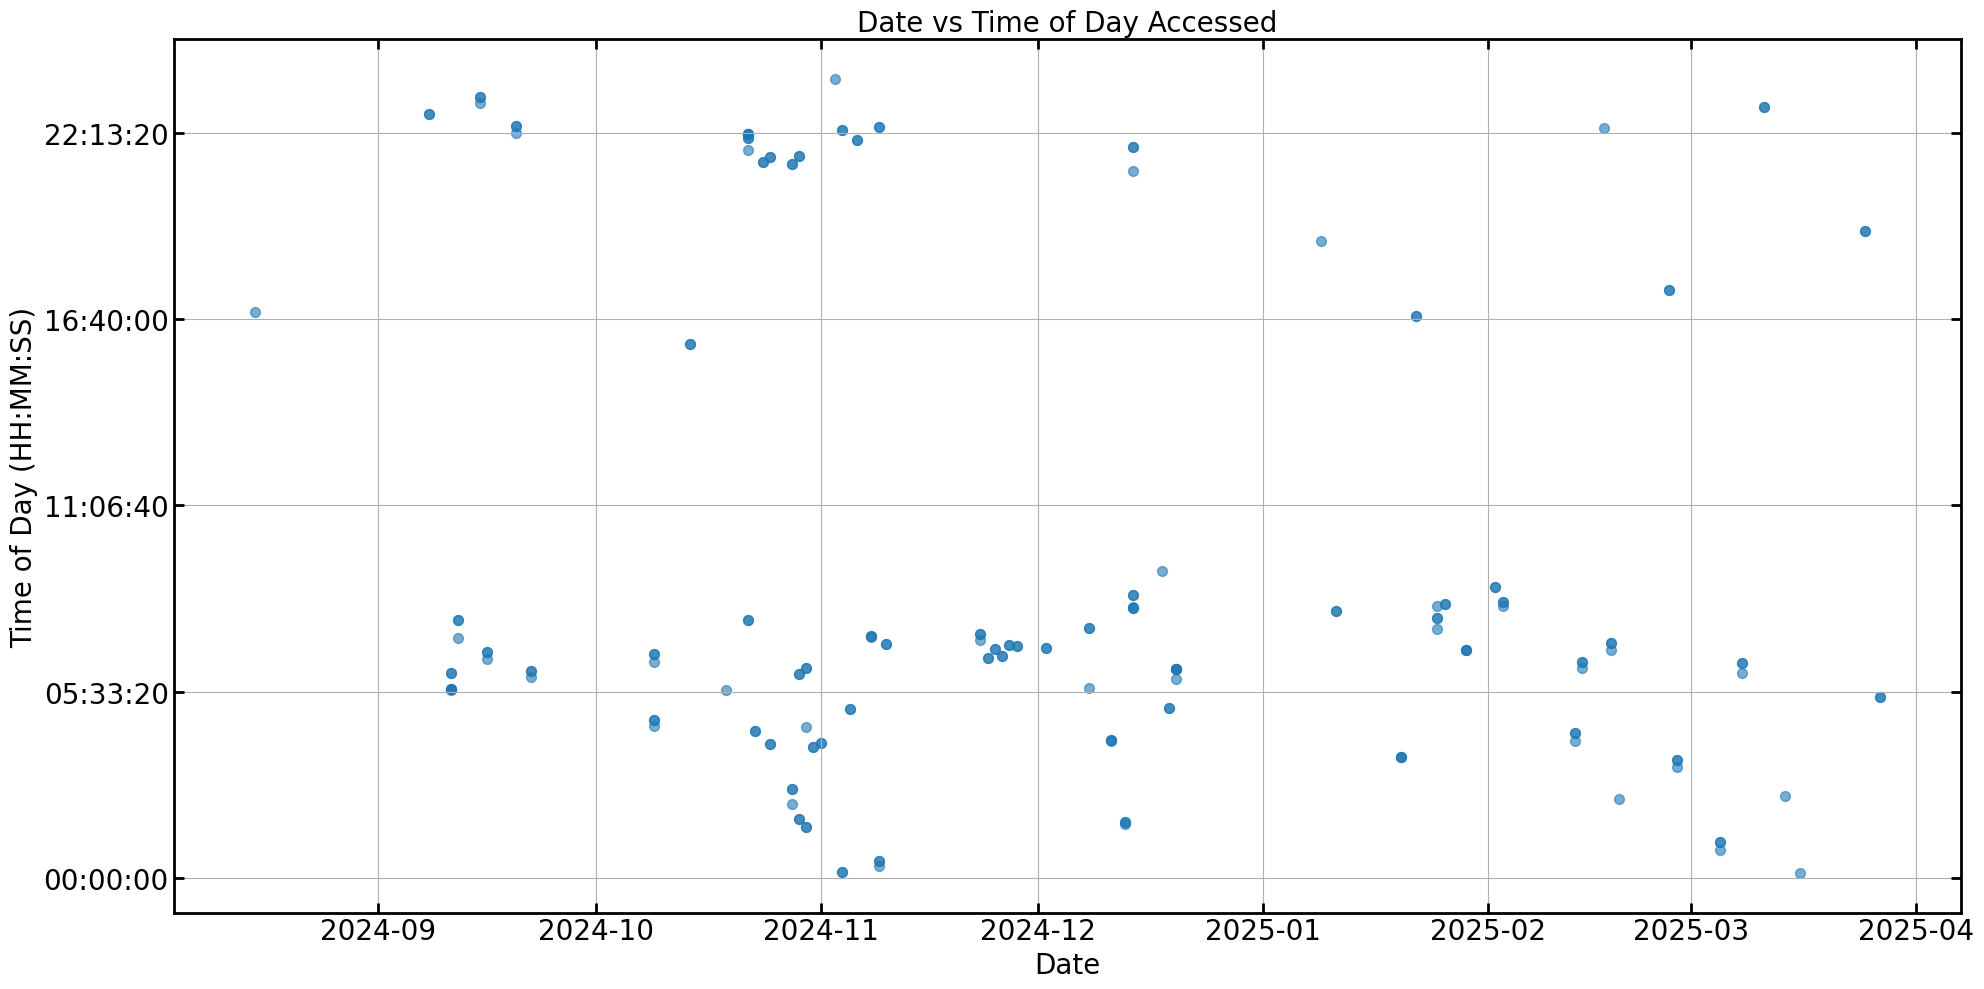

In [100]:
#Time to plot this scatter plot!
plt.figure(figsize=(20, 10))
plt.scatter(mysteryCatelyn_sorted['date'], mysteryCatelyn_sorted['seconds_since_midnight'], alpha=0.6, s=50)

plt.gca().yaxis.set_major_formatter(FuncFormatter(time_format))

plt.xlabel('Date')
plt.ylabel('Time of Day (HH:MM:SS)')
plt.title('Date vs Time of Day Accessed', fontsize=20)
plt.tight_layout()
plt.grid(True)
plt.show()

Above is the scatter plot of Date (YYYY:MM:DD) on the x-axis and Time of Day (HH:MM:SS) on the y-axis. The first thing I notice is that whatever this is, isn't taking data after 11AM and before 4PM (roughly.) This is perplexing to me, especially since I would expect from a normal app that there would be no time access when someone is supposed to be asleep. And there does seem to be this consistent gap of no access mid-day, but access during every other hour.

Let's take a look at the month frequency of app access next to see if we have any more light we can shed on this.

In [101]:
#We want to convert our timestamp column (extracting the year-month) into a string so we can create a bar plot!
mysteryCatelyn_sorted['year_month_string'] = mysteryCatelyn_sorted['time_stamp'].dt.to_period('M').astype(str)

<ipython-input-101-a5d9af3fc0ab>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  mysteryCatelyn_sorted['year_month_string'] = mysteryCatelyn_sorted['time_stamp'].dt.to_period('M').astype(str)


In [102]:
monthCounts_string = mysteryCatelyn_sorted['year_month_string'].value_counts().sort_index()
print(monthCounts_string) #Sanity check here if we did our process correct. We should see 44 observations in 2024-10 as we saw earlier

year_month_string
2024-08     1
2024-09    23
2024-10    44
2024-11    34
2024-12    27
2025-01    17
2025-02    21
2025-03    14
Name: count, dtype: int64


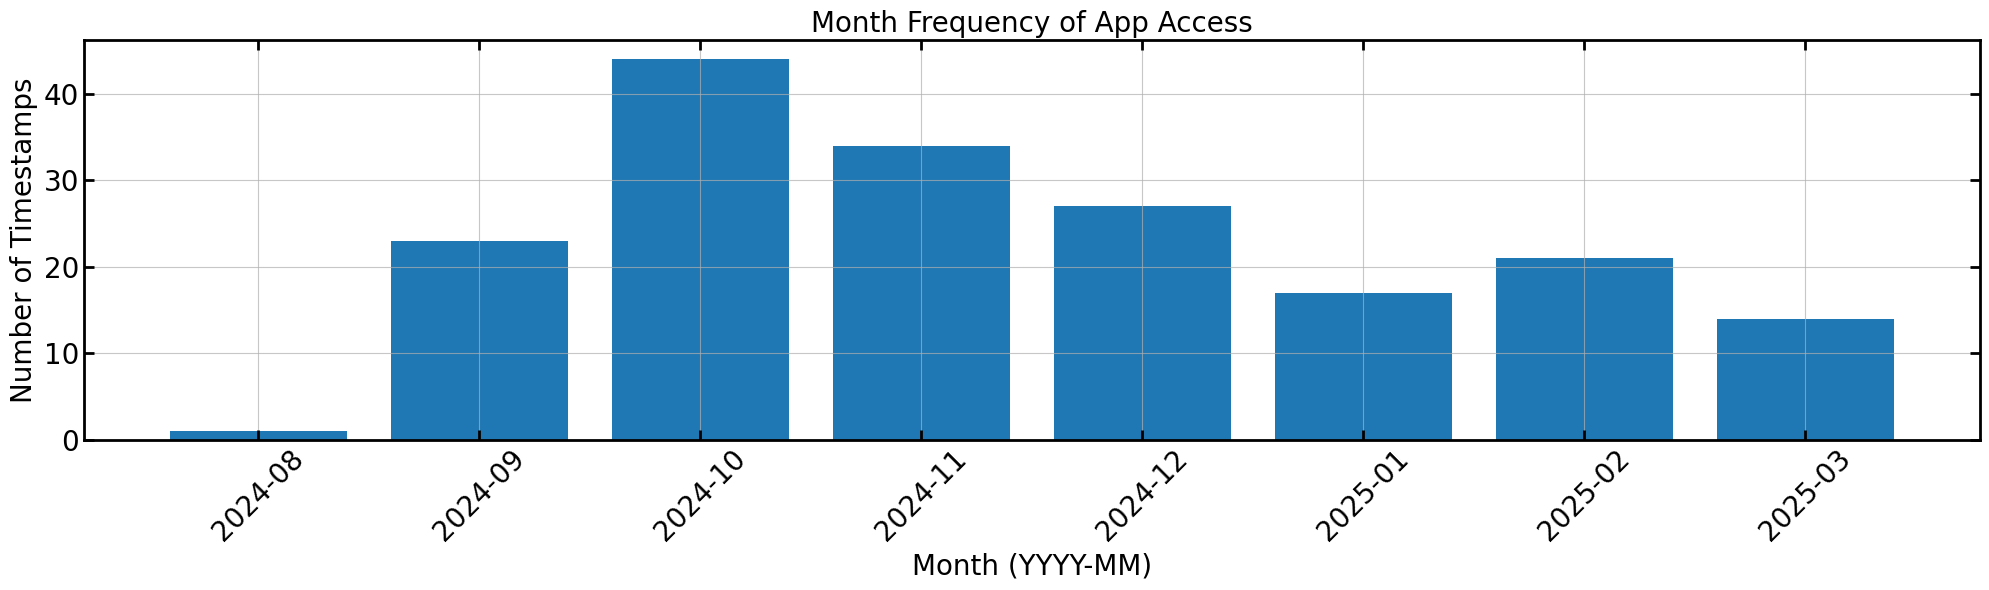

In [103]:
#Time to plot!
plt.figure(figsize=(20, 6))
plt.bar(monthCounts_string.index, monthCounts_string.values)

plt.xticks(rotation=45)
plt.xlabel('Month (YYYY-MM)')
plt.ylabel('Number of Timestamps')
plt.title('Month Frequency of App Access', fontsize=20)
plt.tight_layout()
plt.grid( alpha=0.7)
plt.show()

Above we have a bar plot with the month on the x-axis, and the number of timestamps in that month on the y-axis. We can see that the highest frequency is in 2024-10, and the lowest frequency is 2024-08. I'm unsure what to make of this, as October is usually the month with no breaks witin the school year, and there's no increase in access frequency within winter break.

One last visualization, let's visualize the daily frequency of app access.

In [104]:
#I'm interesting here as a tangent the shortest time between time stamps
print("Shortest time between timestamps:", mysteryCatelyn_sorted['time_diff'].min())

Shortest time between timestamps: 0 days 00:00:00


In [105]:
#Copying the same process as above, but with the total date instead of just year-month
mysteryCatelyn_sorted['date_string'] = mysteryCatelyn_sorted['time_stamp'].dt.date.astype(str)

dayCount = mysteryCatelyn_sorted['date_string'].value_counts().sort_index()

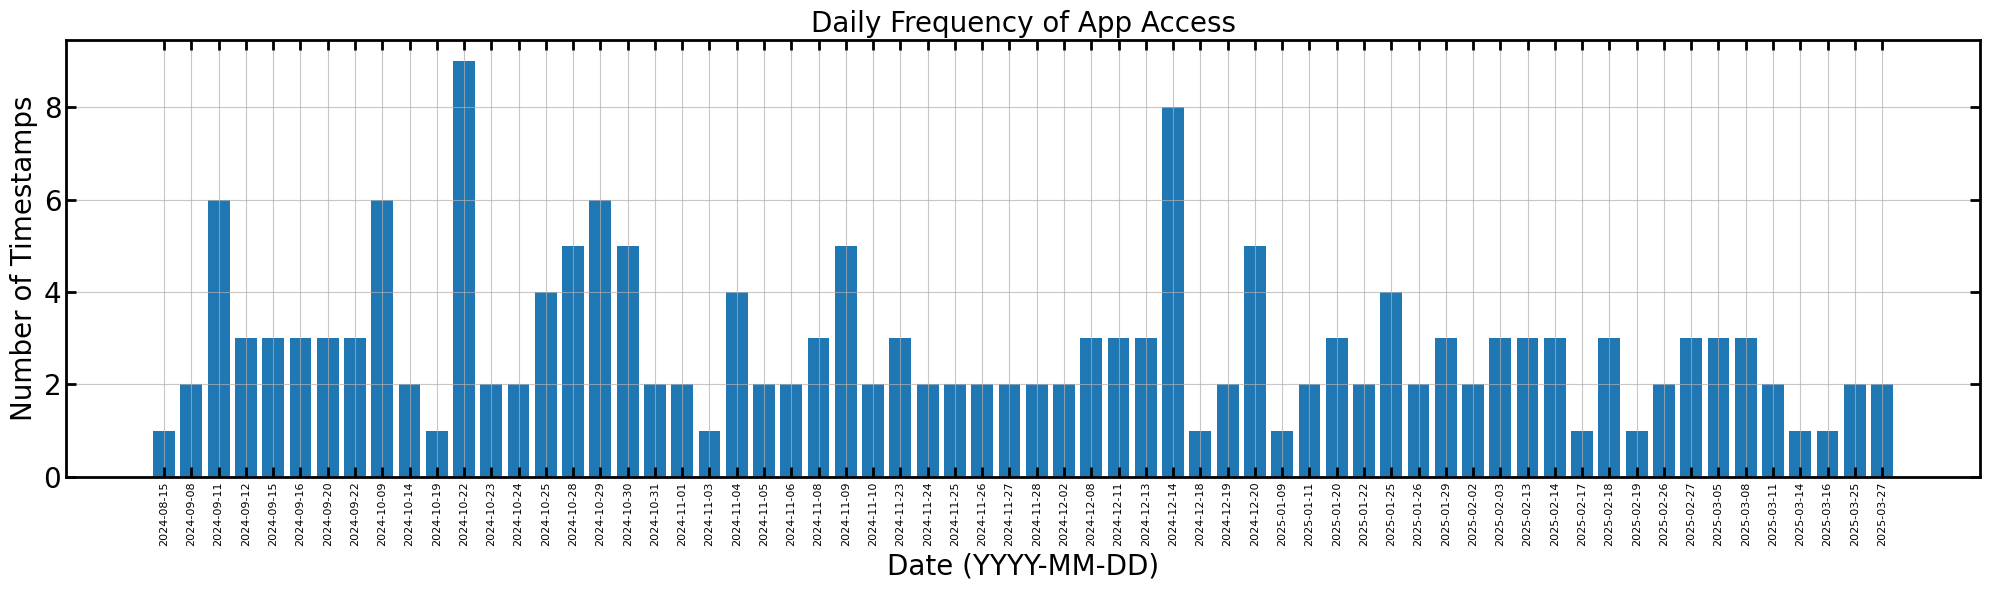

In [106]:
#Time to plot!
plt.figure(figsize=(20, 6))
plt.bar(dayCount.index, dayCount.values)

plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Date (YYYY-MM-DD)')
plt.ylabel('Number of Timestamps')
plt.title('Daily Frequency of App Access', fontsize=20)

plt.tight_layout()

plt.grid(alpha=0.7)
plt.show()

With this final visualization of Catelyn's mystery data, I don't really get any more insights that I haven't seen before. There does seem to be a bit of consistency with the time stamps, with an occasional spike or low count every couple of days.

### 7) Answer: What do you think the source of this data is? Write a few sentences explaining your reasoning, as well as what other data might help you verify if you are correct?

The visualizations of this data is confusing me more than just looking at the average time between time stamps and the longest time between time stamps. I also have to think about what kind of app has the ability to export data. I want to say this is some type of obscure social media app, and assume that Catelyn has an odd sleep schedule, or that the app stays on while she sleeps and takes data. The access times is throwing me off since there are only gaps when class would be in session, but there are not time stops where I would think she would be sleepingl. With that in mind, I would guess that it's a reading app.

Other data that might help me verify if I am correct is knowing what "type" of time stamps these are: times the app is accessed, every time something is clicked, or really the context of the time stamp.

### 8) Exchange your analysis with your partner. Read your partner's analysis -- does it seem accurate? Did they guess the correct data source (or type of data source)?

Catelyn thought that my mystery data was coming from a sleeping app due to the odd times as well, and that there were also spaces in the data when I should be in class. I had extremely high frequency of time stamps per day. Although my data did not come from a sleep app, it was relatively accurate. My data source was actually coming from my Spotify over the past month, and it listed whenever I would listen to a song. I sleep to my spotify on, so it makes sense why I had odd data.

### 9) For the days and months that your partner identified as having the most timestamps in your data, try to figure out what was happening on those days. What other data might help you figure this out?

For the days and months that Catelyn identified having the most timestamps within my data (the first date) lines up with what was happening on the 15th of March. I was flying home, and thus it makes sense I would listen to ~200 songs since I have a six hour flight from Walla Walla to Honolulu, and I'll keep listening till my airpods die. After I got home, I was busy going out with my friends, thus didn't listen to Spotify as much. I think other data that might help me figure this out/Catelyn figure this out more conclusively is potentially my calendar data, of when I'm busy and when I'm not.

## Part 2: Analyzing timestamp data for patterns (Catelyn)

In [107]:
#First, I will import the necessary packages for:

# creating, analyzing, and plotting dataframes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1) Import and inspect Kaleo's mystery timestamp csv file.

In [108]:
# I need to load in Kaleo's data
# By looking at the first ten rows, it appears that the timestamp column includes a date (year-month-day) and time (hour:minute)
# There also appears to be a lot of repeating timestamps
k_mystery = pd.read_csv('/content/drive/MyDrive/CS215_Project7/kaleo_timestamps_mystery.csv')
print(k_mystery.head(10))
print(k_mystery.tail(10))

          timestamp
0  2025-03-15 02:10
1  2025-03-15 02:10
2  2025-03-15 02:10
3  2025-03-15 02:11
4  2025-03-15 02:11
5  2025-03-15 02:11
6  2025-03-15 02:11
7  2025-03-15 02:11
8  2025-03-15 02:11
9  2025-03-15 02:11
             timestamp
1431  2025-04-11 03:04
1432  2025-04-11 03:04
1433  2025-04-11 03:04
1434  2025-04-11 03:04
1435  2025-04-11 03:04
1436  2025-04-11 03:08
1437  2025-04-11 03:11
1438  2025-04-11 03:15
1439  2025-04-11 03:17
1440  2025-04-11 03:19


In [109]:
# timestamp appears to store strings
print(type(k_mystery.timestamp[0]))
print(k_mystery.timestamp[0])


<class 'str'>
2025-03-15 02:10


In [110]:
# The dataframe contains 1441 total non-null entries.
k_mystery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  1441 non-null   object
dtypes: object(1)
memory usage: 11.4+ KB


### 2) Convert the timestamps to date_time objects

In [111]:
#I will convert timestamp's strings to date-time objects to gain more options for analysis by creating a new column: date_time

k_mystery['date_time'] = pd.to_datetime(k_mystery['timestamp'])
print(k_mystery.head())


          timestamp           date_time
0  2025-03-15 02:10 2025-03-15 02:10:00
1  2025-03-15 02:10 2025-03-15 02:10:00
2  2025-03-15 02:10 2025-03-15 02:10:00
3  2025-03-15 02:11 2025-03-15 02:11:00
4  2025-03-15 02:11 2025-03-15 02:11:00


In [112]:
# The strings have successfully been converted to date_time objects
print(type(k_mystery.date_time[0]))
print(k_mystery.date_time[0].date())
print(k_mystery.date_time[0].time())

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2025-03-15
02:10:00


### 3) Create a time difference column

In [113]:
# In order to accurately determine the difference between the current date_time and the previous date_time,
# the date_time column needs to be sorted in chronological (ascending order)

k_mystery_sorted = k_mystery.sort_values(by='date_time')
print(k_mystery_sorted.head())
print(k_mystery_sorted.tail())

           timestamp           date_time
0   2025-03-15 02:10 2025-03-15 02:10:00
1   2025-03-15 02:10 2025-03-15 02:10:00
2   2025-03-15 02:10 2025-03-15 02:10:00
13  2025-03-15 02:11 2025-03-15 02:11:00
12  2025-03-15 02:11 2025-03-15 02:11:00
             timestamp           date_time
1436  2025-04-11 03:08 2025-04-11 03:08:00
1437  2025-04-11 03:11 2025-04-11 03:11:00
1438  2025-04-11 03:15 2025-04-11 03:15:00
1439  2025-04-11 03:17 2025-04-11 03:17:00
1440  2025-04-11 03:19 2025-04-11 03:19:00


In [114]:
# I will use pandas.diff() to calculate the time difference between consecutive date_times
k_mystery_sorted['time_diff'] = k_mystery_sorted['date_time'].diff()

print(k_mystery_sorted.head())


           timestamp           date_time       time_diff
0   2025-03-15 02:10 2025-03-15 02:10:00             NaT
1   2025-03-15 02:10 2025-03-15 02:10:00 0 days 00:00:00
2   2025-03-15 02:10 2025-03-15 02:10:00 0 days 00:00:00
13  2025-03-15 02:11 2025-03-15 02:11:00 0 days 00:01:00
12  2025-03-15 02:11 2025-03-15 02:11:00 0 days 00:00:00


### 4) Answer: What is the longest time between timestamps? What is the average time between timestamps?

In [115]:
print(k_mystery_sorted['time_diff'].max())
print(k_mystery_sorted['time_diff'].min())

print(k_mystery_sorted['time_diff'].median())
# The mean is much greater than the median, indicating that there may be some outliers or extreme differences between certain timestamps
print(k_mystery_sorted['time_diff'].mean())

2 days 07:45:00
0 days 00:00:00
0 days 00:02:00
0 days 00:27:02.875000


**Conclusion**: The longest time between timestamps was 2 days, 7 hours, and 45 minutes.  The mean time betweeen time stamps is about 27 minutes and 2 seconds while the median time between timestamps is 2 minutes.

### 5) Answer: What is the day with the most timestamps? How many events (timestamps) were on that day?

In [116]:
# I will make date, time, and month columns using the date_time object features

k_mystery_sorted['date'] = k_mystery_sorted['date_time'].dt.date
k_mystery_sorted['time'] = k_mystery_sorted['date_time'].dt.time
k_mystery_sorted['month'] = k_mystery_sorted['date_time'].dt.month
print(k_mystery_sorted.head())


           timestamp           date_time       time_diff        date  \
0   2025-03-15 02:10 2025-03-15 02:10:00             NaT  2025-03-15   
1   2025-03-15 02:10 2025-03-15 02:10:00 0 days 00:00:00  2025-03-15   
2   2025-03-15 02:10 2025-03-15 02:10:00 0 days 00:00:00  2025-03-15   
13  2025-03-15 02:11 2025-03-15 02:11:00 0 days 00:01:00  2025-03-15   
12  2025-03-15 02:11 2025-03-15 02:11:00 0 days 00:00:00  2025-03-15   

        time  month  
0   02:10:00      3  
1   02:10:00      3  
2   02:10:00      3  
13  02:11:00      3  
12  02:11:00      3  


In [117]:
# There are timestamps on 23 different days (suggesting that Kaleo's data was collected over about a month)
k_days = k_mystery_sorted['date'].unique()

print(len(k_days))
print(k_days.min())
print(k_days.max())

23
2025-03-15
2025-04-11


In [118]:
# The day with the most timestamps March 15, 2025
k_mystery_sorted['date'].mode()

,date
0,2025-03-15


In [119]:
#I know that March 15, 2025 is the earliest date recorded, so I compared all the date values to the value at index 0 to find
# the number of timestamps on March 15.
print(len(k_mystery_sorted[k_mystery_sorted['date'] == k_mystery_sorted['date'][0]]))

440


In [120]:
# There are only 888 unique date_times, supporting my observation that there are a lot of repeating timestamps.
k_unique_datetimes = k_mystery_sorted['date_time'].unique()
print(len(k_unique_datetimes))
print(k_unique_datetimes.min())
print(k_unique_datetimes.max())

888
2025-03-15 02:10:00
2025-04-11 03:19:00


In [121]:
#The range of times these timestamps are collected at seem to span a full 24 hours
k_times = k_mystery_sorted['time'].unique()
print(len(k_times))
print(k_times.min())
print(k_times.max())


660
00:04:00
23:59:00


**Conclusion**:  March 15, 2025 is the date that has the most time stamps.  In fact, it accounts for almost a third of the timestamps, suggesting that something significant happened on this day.

### 6) Analyze the data with a visualization

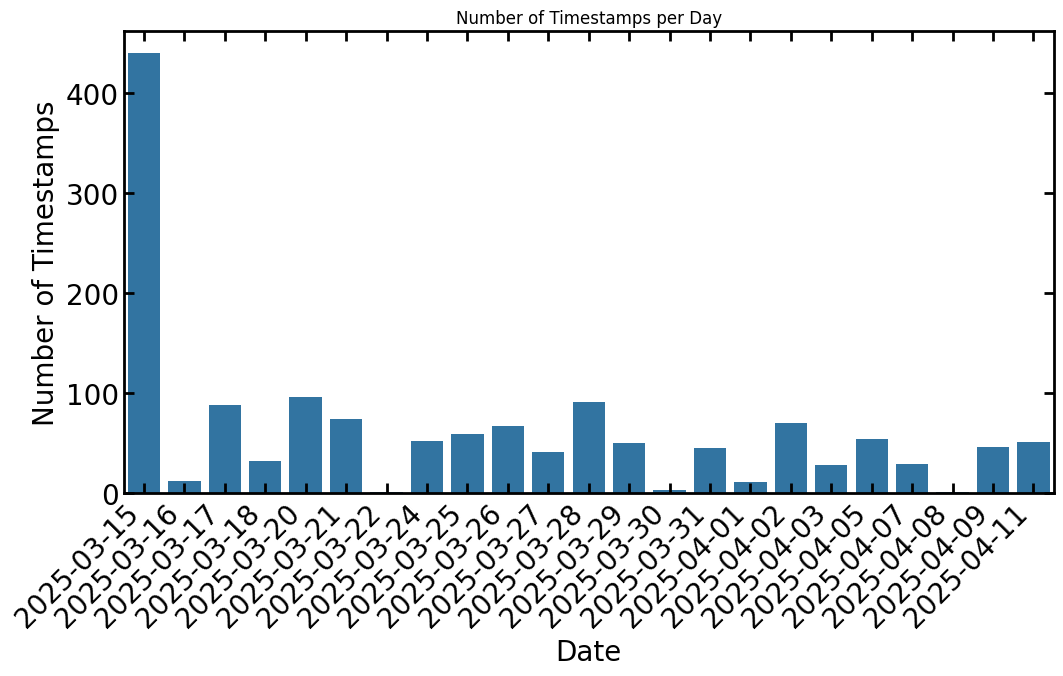

In [122]:
#I will create a bar chart with each unique date as the x-axis and the number of timestamps within each day as the y-axis

# Group the data by date and count the occurrences
k_date_counts = k_mystery_sorted.groupby('date')['date_time'].count()

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=k_date_counts.index, y=k_date_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of Timestamps')
plt.title('Number of Timestamps per Day')
plt.xticks(rotation=45, ha='right')  # I used Gemini to help me rotate the x-axis labels for better readability
plt.show()


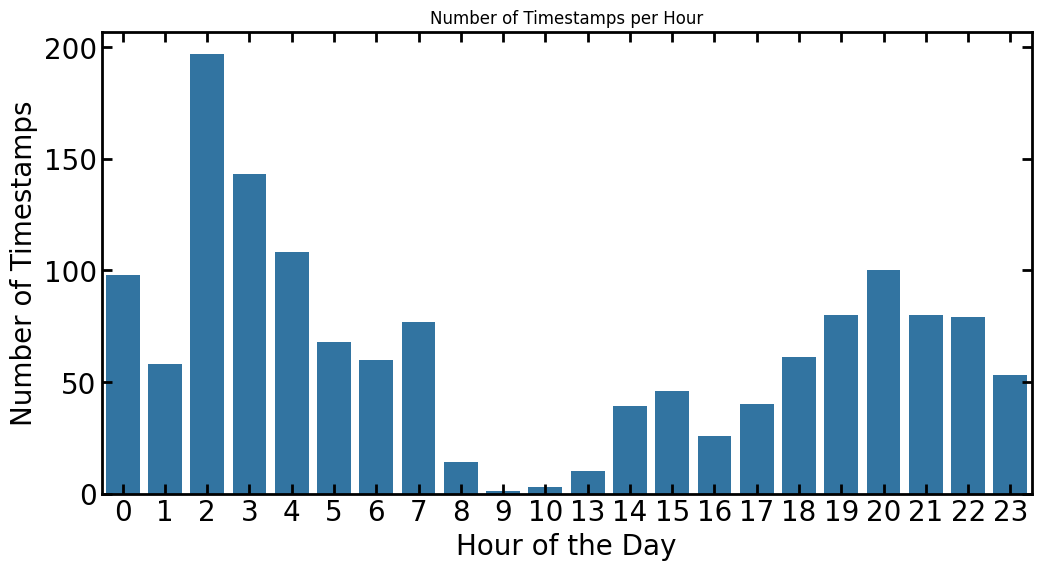

In [123]:
# I will create bar chart with each hour of the day as the x-axis and the number of date_times within each time as the y-axis

# Group the data by hour and count the occurrences
k_hour_counts = k_mystery_sorted.groupby(k_mystery_sorted['date_time'].dt.hour)['date_time'].count()

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=k_hour_counts.index, y=k_hour_counts.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Timestamps')
plt.title('Number of Timestamps per Hour')
plt.show()


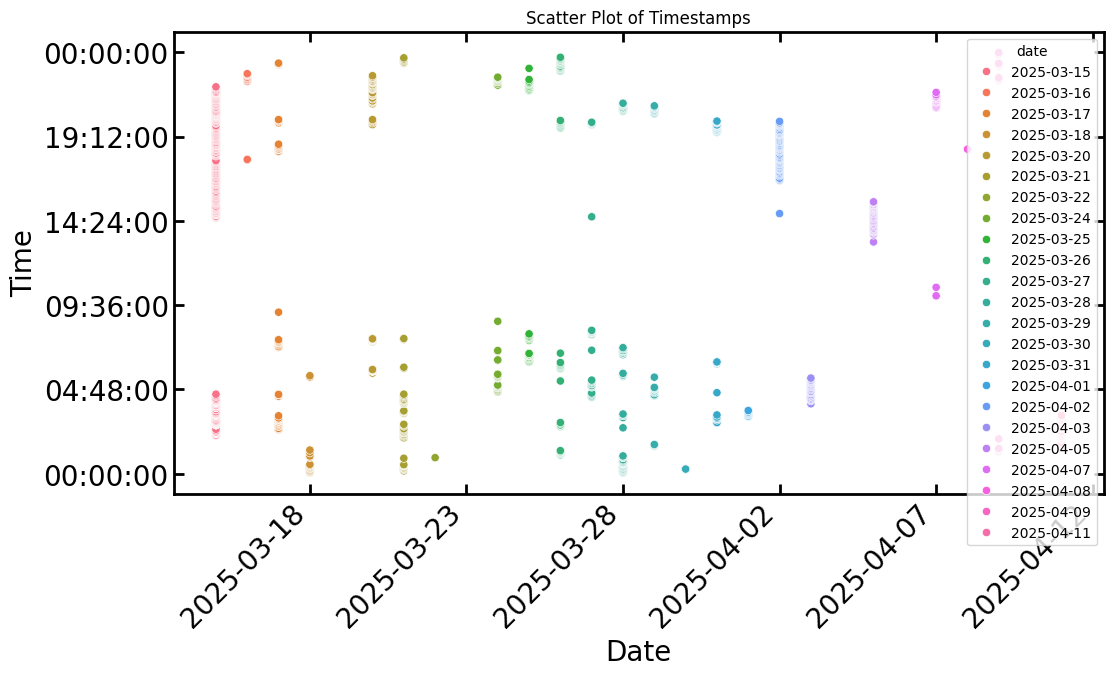

In [124]:
#I will create a scatter plot from the mystery sorted data frame with the x-axis as the date column and the y-axis as the time column.
#I will also make each date's points a different color.

plt.figure(figsize=(12, 6))

# I used gemini to help me convert 'date' and 'time' columns to matplotlib compatible datatypes.
# Gemini converted them to numeric representations using matplotlib.dates.date2num and matplotlib.dates.time2num
import matplotlib.dates as mdates
from datetime import datetime, timedelta

k_mystery_sorted['date_num'] = k_mystery_sorted['date'].apply(mdates.date2num) # convert to numeric representation
k_mystery_sorted['time_num'] = k_mystery_sorted['time'].apply(lambda t: mdates.date2num(datetime.combine(datetime.today(), t))) # convert to numeric representation

sns.scatterplot(x='date_num', y='time_num', hue='date', data=k_mystery_sorted)
plt.xlabel('Date')
plt.ylabel('Time')
plt.title('Scatter Plot of Timestamps')
plt.xticks(rotation=45, ha='right')


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))#Format x-axis to show dates
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) # Format y-axis ticks to show times
plt.show()

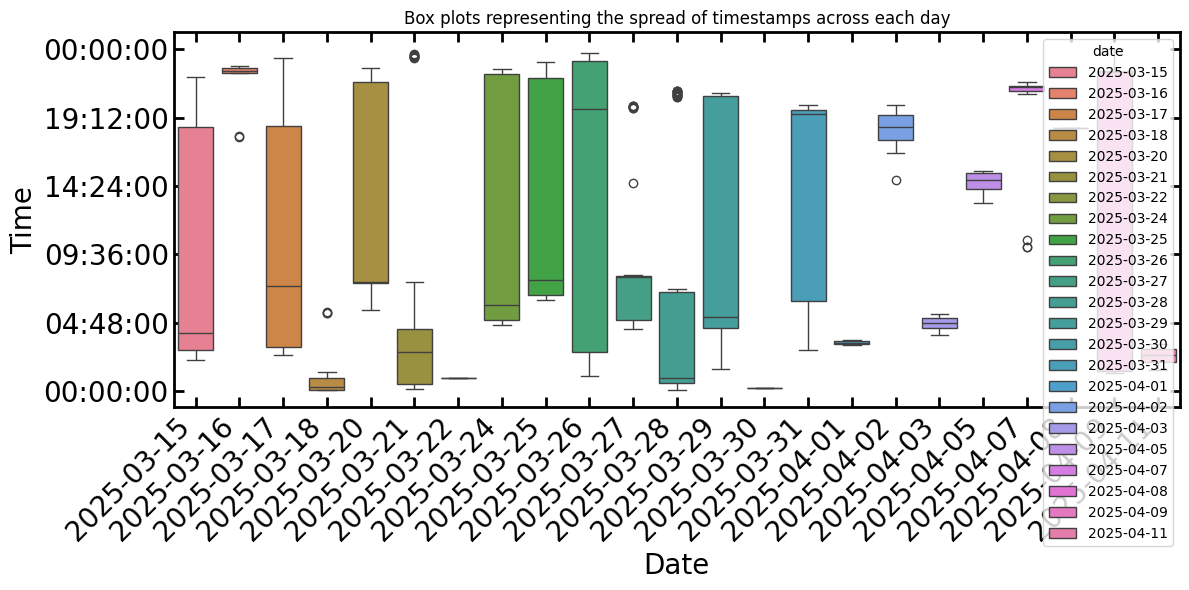

In [125]:
# To try and get a better idea of the spread of timestamps throughout each day, I will create boxplots.

plt.figure(figsize=(12, 6))
sns.boxplot(x='date', y='time_num', data= k_mystery_sorted, hue = 'date')  # Use time_num for boxplot
plt.xlabel('Date')
plt.ylabel('Time')
plt.title('Box plots representing the spread of timestamps across each day')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) # Format y-axis ticks to show time
plt.tight_layout()
plt.show()


### 7) Answer: What do you think the source of this data is? Write a few sentences explaining your reasoning, as well as what other data might help you verify if you are correct?

**Analysis**:  It seems like Kaleo's mystery timestamps are recorded with significantly short intervals since the median difference between timestamps is about 2 minutes.  Furthermore, its seems like the timestamps are recorded most frequently later in the evening or in the morning (with the most timestamps being recorded at 2am).  Finally, the first day seems to have the most timestamps by far, suggesting that some of the timestamps could be attributed to a special event like initialization.


**Guess 1**: The timestamps are from a sleep tracker.

**Guess 2**: Based on Kaleo's major, the timestamps could be from a device that detects meteors.

### 8) Check guess with Kaleo

**Reflection**: After talking with Kaleo, she revealed that the timestamps were from her Spotify account that were taken whenever a song started playing.  Repeated timestamps occured whenever she quickly skipped a song.  Also, she told me that she often listens to music at night while she sleeps which explains why timestamps are most frequently recorded later at night and in the morning.

Kaleo guessed that my timestamps were from a social media app or a reading app.  I think she made a pretty good guess, considering I chose an obscure source (Google's IP address timestamps). Furthermore, the timestamps were irregular and not collected often because I don't use my personal Google account as much as my school account.

### 9) What do we think was happening on the days with the most timestamps?  What other data might help us figure it out?

**Answer**: Kaleo mentioned that she was on a flight home on March 15th and that she was listening to music the whole flight.  This explains why most of the timestamps were from this day, since she was listening to music for hours.

Google collected my IP address the most times on October 22, 2024.  I might have been switching between my Google accounts more frequently that day.  I remember I decided to try and switch between my school and personal accounts more often to try and separate my academic life and personal life.  Maybe this was the day I started trying to achieve this goal.  Admittedly,  I have not kept up with it.

***

## Part 3: Make a combined visualization (Both)

### 1) First, discuss your results together -- what did you learn about yourself and your partner through doing this?

**Kaleo**: I learned that I listen to Spotify way too much, and that it probably explains why my phone battery dies out so quickly. I'll be putting the Spotify sleep timer on from now on before falling asleep (sleep timer will shut off the music after a set amount of time.)

I learned that Catelyn's data came from Google tracking her IP address, which is something I did not know you could request, and find it odd that it was accessing her IP when I would think she'd be actively on her Google account, instead while she's asleep. I for sure couldn't have guessed that it was Google IP address.

**Catelyn**:  I learned that Kaleo listens to Spotify while she sleeps.  I didn't even consider this as a possibility while making my guess since I need a quiet environment to sleep well.  This was a good lesson for me about how my biases can prevent me from reaching an accurate conclusion during data analysis, and how I need to pause whenever I rule something out 'easily'.

Furthermore,  I realized that I do not use my personal Google account a lot.  I am considering putting more effort into switching between my personal and school accounts again.

### 2) Then, using both partners' timestamp data, create at least one visualization that shows the distribution of events over time for both people (on the same visualization).

Below first is Kaleo's data loaded in, and having it put within datetime format from pandas, sorting the values, then converting the timestamp time portion to match the seconds_since_midnight column that was added within Catelyn's mystery data so we can plot them together.

In [ ]:
#Loading in the .csv file
kaleoTimestamps = pd.read_csv("/content/drive/MyDrive/CS215_Project7/kaleo_timestamps_mystery.csv")

In [ ]:
kaleoTimestamps['time_stamp'] = pd.to_datetime(kaleoTimestamps['timestamp'])

kaleoSorted = kaleoTimestamps.sort_values(by='time_stamp').reset_index(drop=True) #sorting chronologically

In [ ]:
#Converting the time into seconds
kaleoSorted['seconds_since_midnight'] = (kaleoSorted['time_stamp'].dt.hour * 3600 + kaleoSorted['time_stamp'].dt.minute * 60 + kaleoSorted['time_stamp'].dt.second)

In [ ]:
#Extracting the date as a seperate column
kaleoSorted['date'] = kaleoSorted['time_stamp'].dt.date

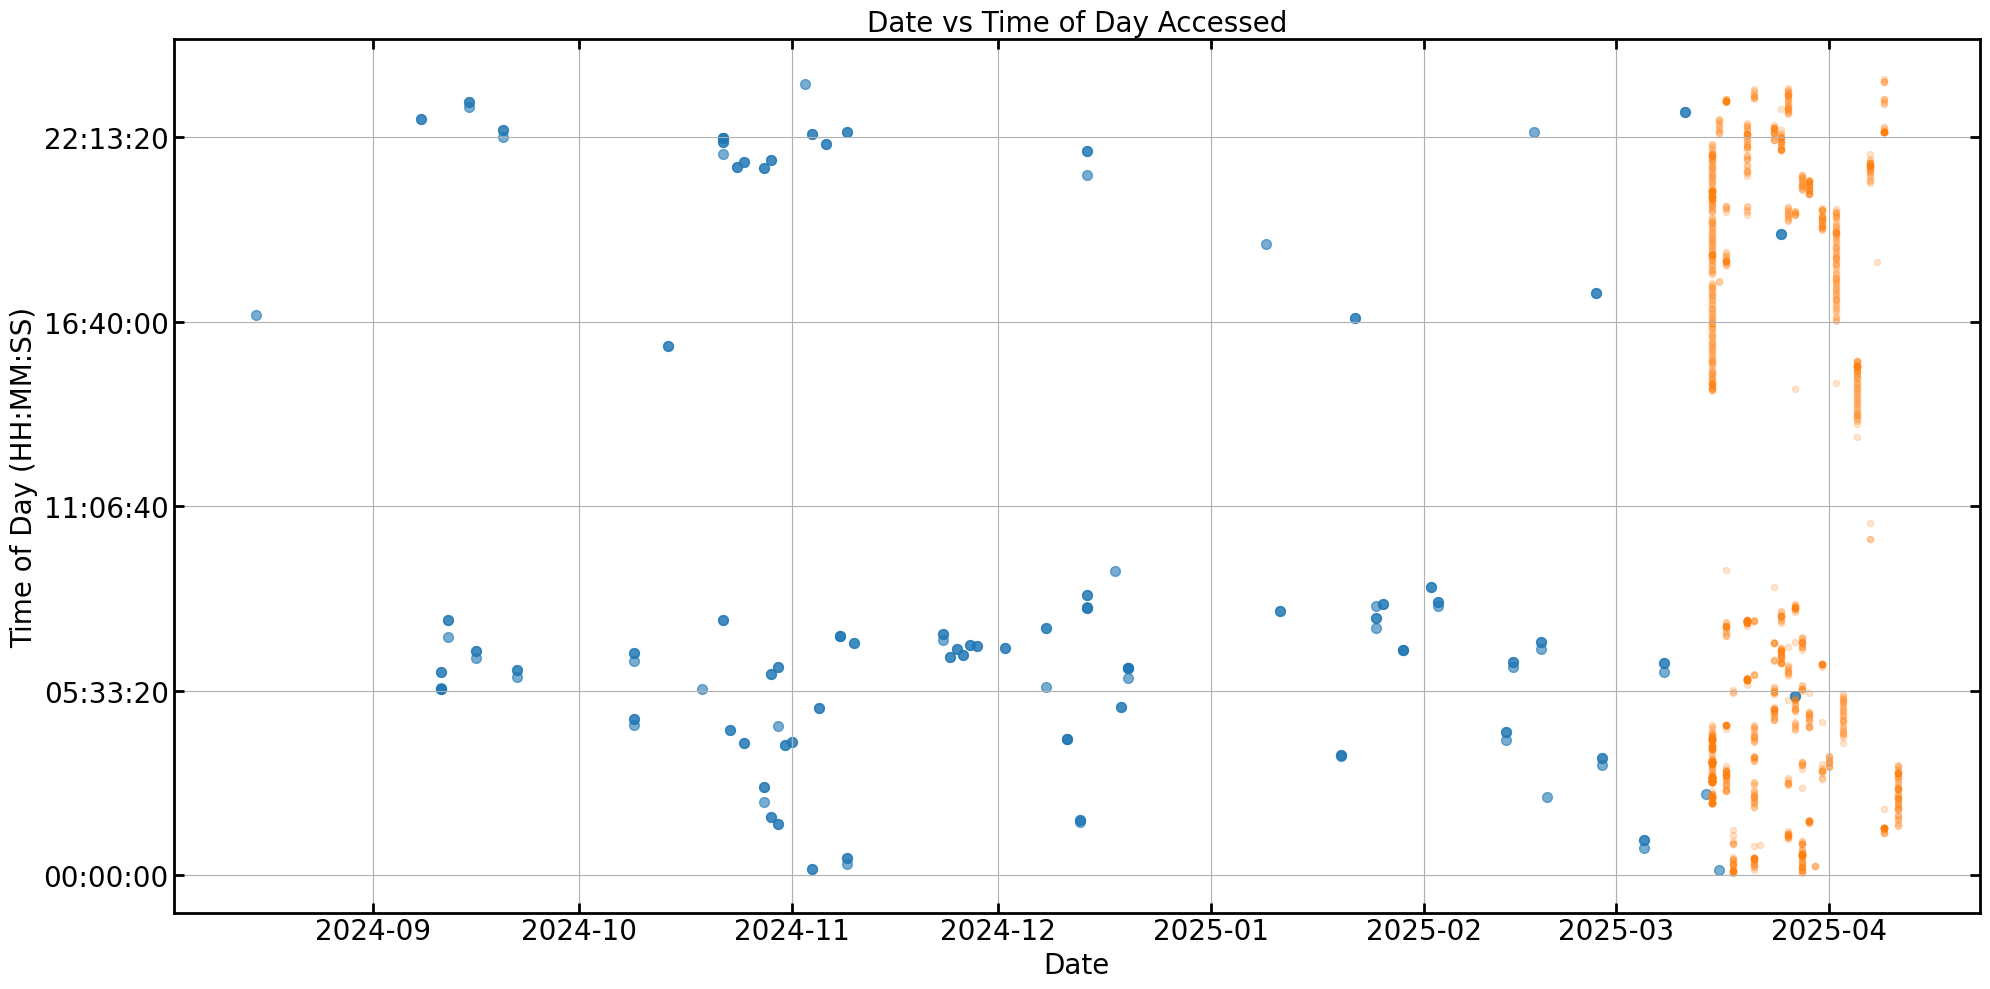

In [ ]:
#Now we can plot both Catelyn and Kaleo's data together
plt.figure(figsize=(20, 10))
plt.scatter(mysteryCatelyn_sorted['date'], mysteryCatelyn_sorted['seconds_since_midnight'], alpha=0.6, s=50)
plt.scatter(kaleoSorted['date'], kaleoSorted['seconds_since_midnight'], alpha=0.2, s=20)

plt.gca().yaxis.set_major_formatter(FuncFormatter(time_format))

plt.xlabel('Date')
plt.ylabel('Time of Day (HH:MM:SS)')
plt.title('Date vs Time of Day Accessed', fontsize=20)
plt.tight_layout()
plt.grid(True)
plt.show()

We can also use a pie chart as an alternate type of viewing the distribution of events over time, since we sorted both data frames by chronological order.

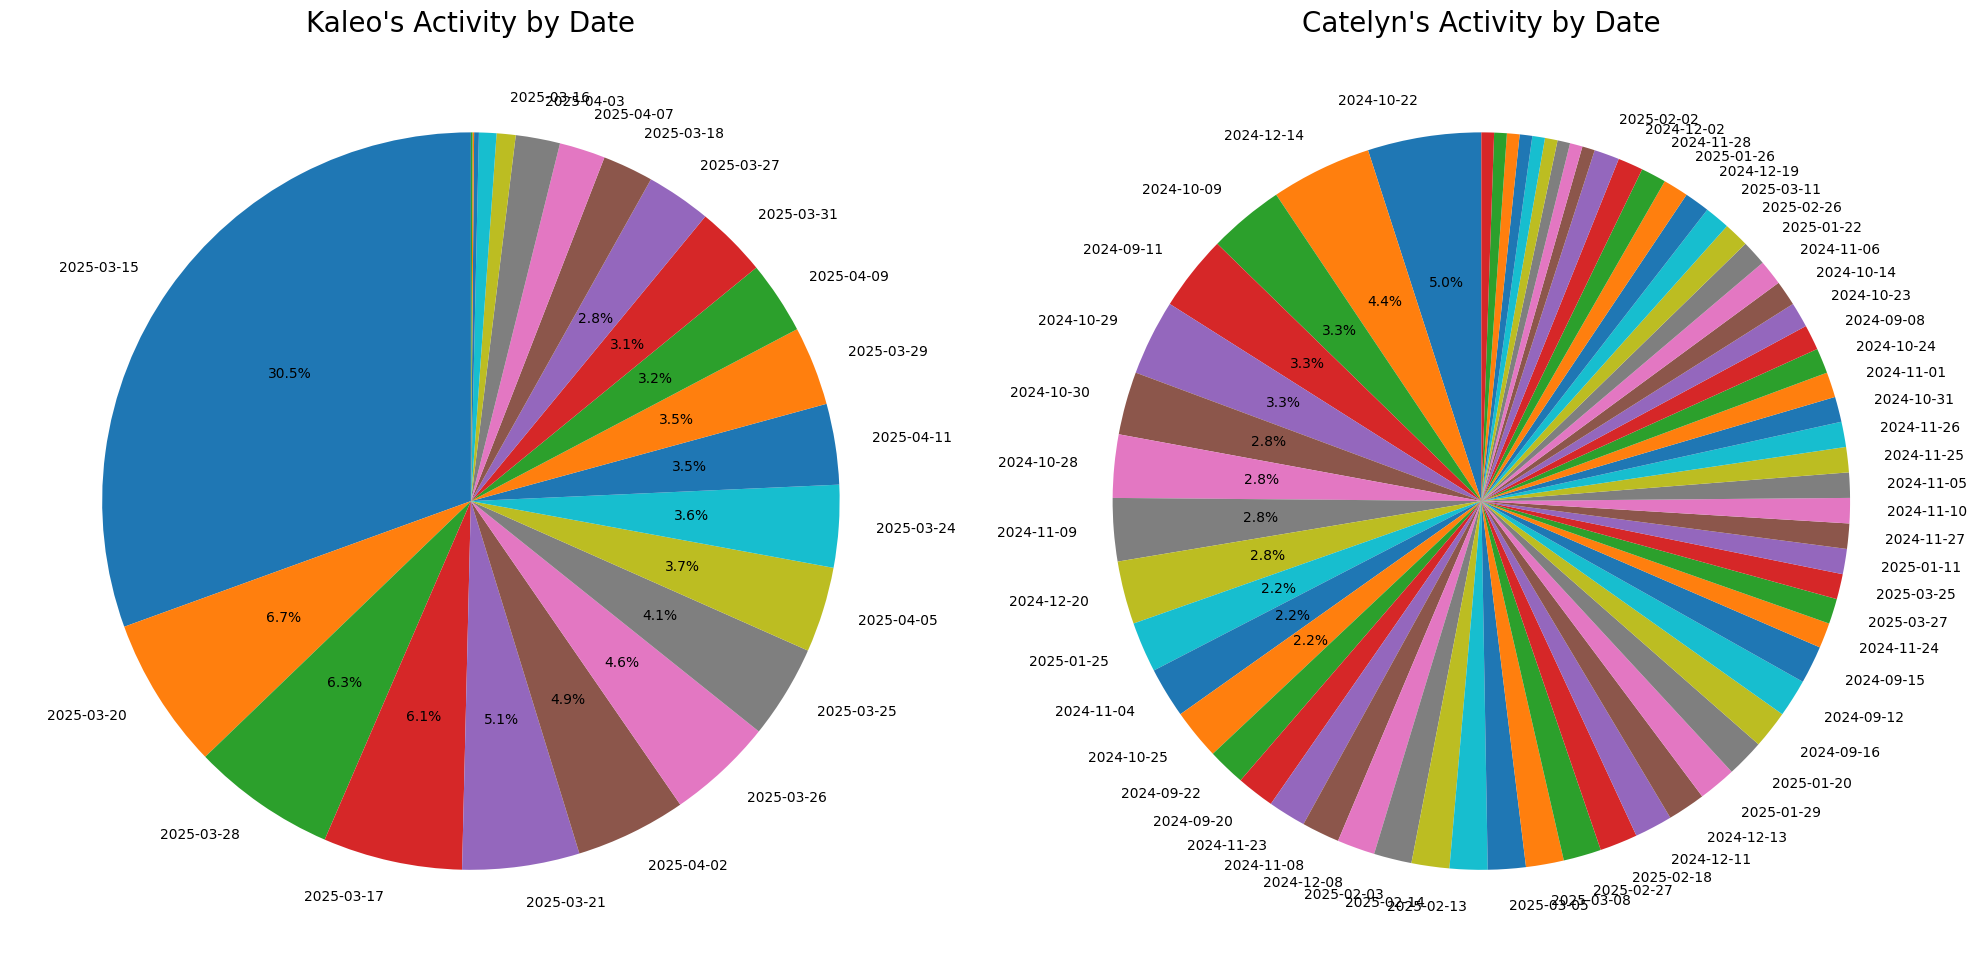

In [ ]:
#Now for a pie plot!
fix, ax = plt.subplots(1, 2, figsize=(20, 10))

kaleoSorted.date.value_counts().plot(kind="pie", ax=ax[0], autopct= lambda pct: f'{pct:.1f}%' if pct >=2.5 else '',
                                     startangle=90)
#Lambda function above so I can mask over some of the labels since the pie chart gets super super small
ax[0].set_title("Kaleo's Activity by Date", fontsize=20)
ax[0].set_ylabel("")
for i, text in enumerate(ax[0].texts): #Limiting the text here since it bunches together
  if i < 38:
    text.set_fontsize(10)
  else:
      text.set_text('')


mysteryCatelyn_sorted.date.value_counts().plot(kind="pie", ax=ax[1], autopct = lambda pct: f'{pct:.1f}%' if pct >=2.0 else '',  startangle=90)
#Lambda function above so I can mask over some of the labels since the pie chart gets super super small
ax[1].set_title("Catelyn's Activity by Date", fontsize=20)
ax[1].set_ylabel("")
for i, text in enumerate(ax[1].texts):  #Limiting the text here since it bunches together again
  if i < 110:
    text.set_fontsize(10)
  else:
      text.set_text('')

plt.tight_layout()
plt.show()

In [ ]:
mysteryCatelyn_sorted

,Unnamed: 0,time_stamp,time_diff,date,year_month,time,seconds_since_midnight,year_month_string,date_string
0,180,2024-08-15 16:52:10+00:00,NaT,2024-08-15,2024-08,16:52:10,60730,2024-08,2024-08-15
1,179,2024-09-08 22:46:57+00:00,24 days 05:54:47,2024-09-08,2024-09,22:46:57,82017,2024-09,2024-09-08
2,178,2024-09-08 22:47:06+00:00,0 days 00:00:09,2024-09-08,2024-09,22:47:06,82026,2024-09,2024-09-08
3,177,2024-09-11 05:37:04+00:00,2 days 06:49:58,2024-09-11,2024-09,05:37:04,20224,2024-09,2024-09-11
4,175,2024-09-11 05:37:13+00:00,0 days 00:00:09,2024-09-11,2024-09,05:37:13,20233,2024-09,2024-09-11
...,...,...,...,...,...,...,...,...,...
176,4,2025-03-16 00:08:43+00:00,1 days 21:41:58,2025-03-16,2025-03,00:08:43,523,2025-03,2025-03-16
177,3,2025-03-25 19:17:59+00:00,9 days 19:09:16,2025-03-25,2025-03,19:17:59,69479,2025-03,2025-03-25
178,2,2025-03-25 19:17:59+00:00,0 days 00:00:00,2025-03-25,2025-03,19:17:59,69479,2025-03,2025-03-25
179,1,2025-03-27 05:23:03+00:00,1 days 10:05:04,2025-03-27,2025-03,05:23:03,19383,2025-03,2025-03-27


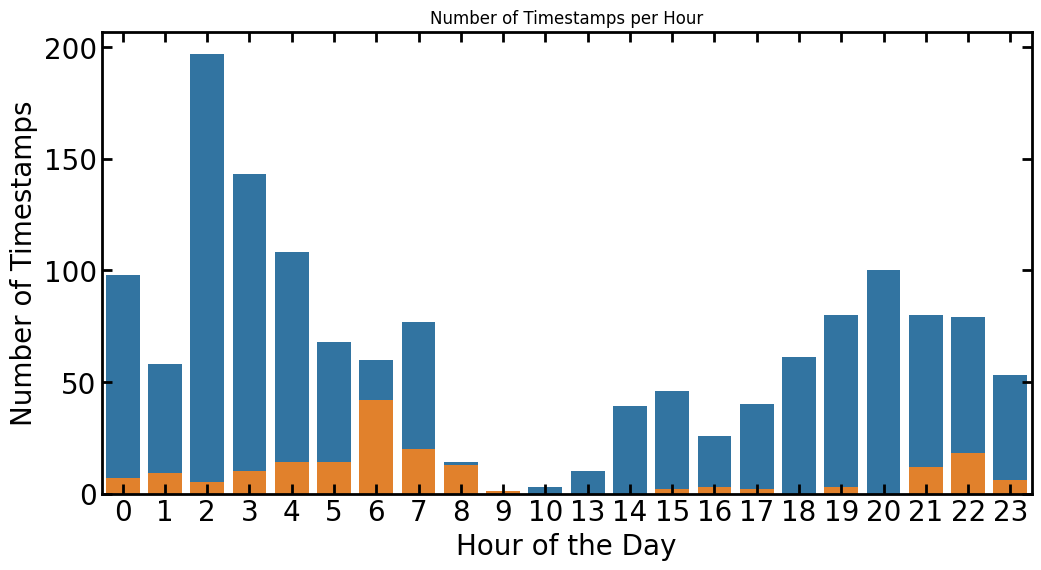

In [ ]:
c_hour_counts = mysteryCatelyn_sorted.groupby(mysteryCatelyn_sorted['time_stamp'].dt.hour)['time_stamp'].count()

# Create the bar chart for Kaleo's hour counts
plt.figure(figsize=(12, 6))
sns.barplot(x=k_hour_counts.index, y=k_hour_counts.values)

#Add another bar chart for Catelyn's hour counts on top of the first bar chart
sns.barplot(x=c_hour_counts.index, y=c_hour_counts.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Timestamps')
plt.title('Number of Timestamps per Hour')
plt.show()

### 3) What do you notice by looking at both partners' data together that you didn't notice looking at the on their own?

**Kaleo**: The most obvious difference between Catelyn's and I's data that isn't obvious looking on their own is that while I had more rows of data, my data came from a shorter time period than hers. Her data covered a longer time span, but with fewer rows. Also, I had a more extreme distribution of timestamps within a single day compared to hers which is obvious looking at the pie charts side by side. I think this definitely comes from that our sources of data were very different. Also, we have the same space during the "class day" where no data is collected, which is an odd coincidence.

**Catelyn**: Kaleo has a lot more timestamps than me even though her data was collected over a month while my data was collected over an 8-month period.  This suggests that Kaleo gets more use out of her Spotify account than I get out of my personal Google account.  Also, both timestamp distributions suggest that Kaleo and I's timestamps are collected most often in the morning or at night (since Kaleo's timestamps peak at 2am while my timestamps peak at 6am).

***

## Part 4: Analyze and visualize an additional element from  your personal data (Kaleo)

### At least two clear questions that you ask and then (attempt to) answer via data analysis

1. Who is my most listened artist over the period Spotify collected my data?

2. What is my most listened to song? What is my least listened to song (that is not a song that has 0 listening time)?

3. How did my time listening to my top artist change over time?

### At least one form of data manipulation (calculating new values, doing a groupby, etc.)

The first question I want to answer is, "Who is my most listened artist over the period that Spotify collected my data?" I want to look at the columns of my original data frame, then I want to make a mask to mask over any data that has no time logged as being listened to, then use .groupby() to group by artist and time played.

In [ ]:
#Looking at what columns are present within my original data frame
mysteryKaleo.columns

Index(['endTime', 'artistName', 'trackName', 'msPlayed'], dtype='object')

In [ ]:
#Then here I'm making a boolean mask to not include any songs that have 0 miliseconds listened to
nonzeroSongs = mysteryKaleo[mysteryKaleo["msPlayed"]>0]

In [ ]:
#Here, 'm converting from milisecond to hours played
nonzeroSongs['hoursPlayed'] = nonzeroSongs['msPlayed'] / (1000 * 60 * 60)

<ipython-input-94-669a4aedf1ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonzeroSongs['hoursPlayed'] = nonzeroSongs['msPlayed'] / (1000 * 60 * 60)


In [ ]:
#Then I'm sorting my values because I can confirm which artist has the highest time listened to
timeArtist = nonzeroSongs.groupby('artistName')['hoursPlayed'].sum().sort_values(ascending=False)

print(timeArtist.head(5))

artistName
bbno$              3.089292
ConcernedApe       2.232454
Ninja Sex Party    1.671463
Starbomb           1.629176
Big Data           0.996553
Name: hoursPlayed, dtype: float64


In [ ]:
#Then I can find out which artist I listened to the most via computation!

print("The artist I listened to the most was" , timeArtist.idxmax() , "with", timeArtist.max() ,"hours.")

The artist I listened to the most was bbno$ with 3.0892919444444447 hours.


In [ ]:
#Now let's verify this using a visualization, going to use .head(10) to grab my top ten artists
top10Artists = timeArtist.head(10)

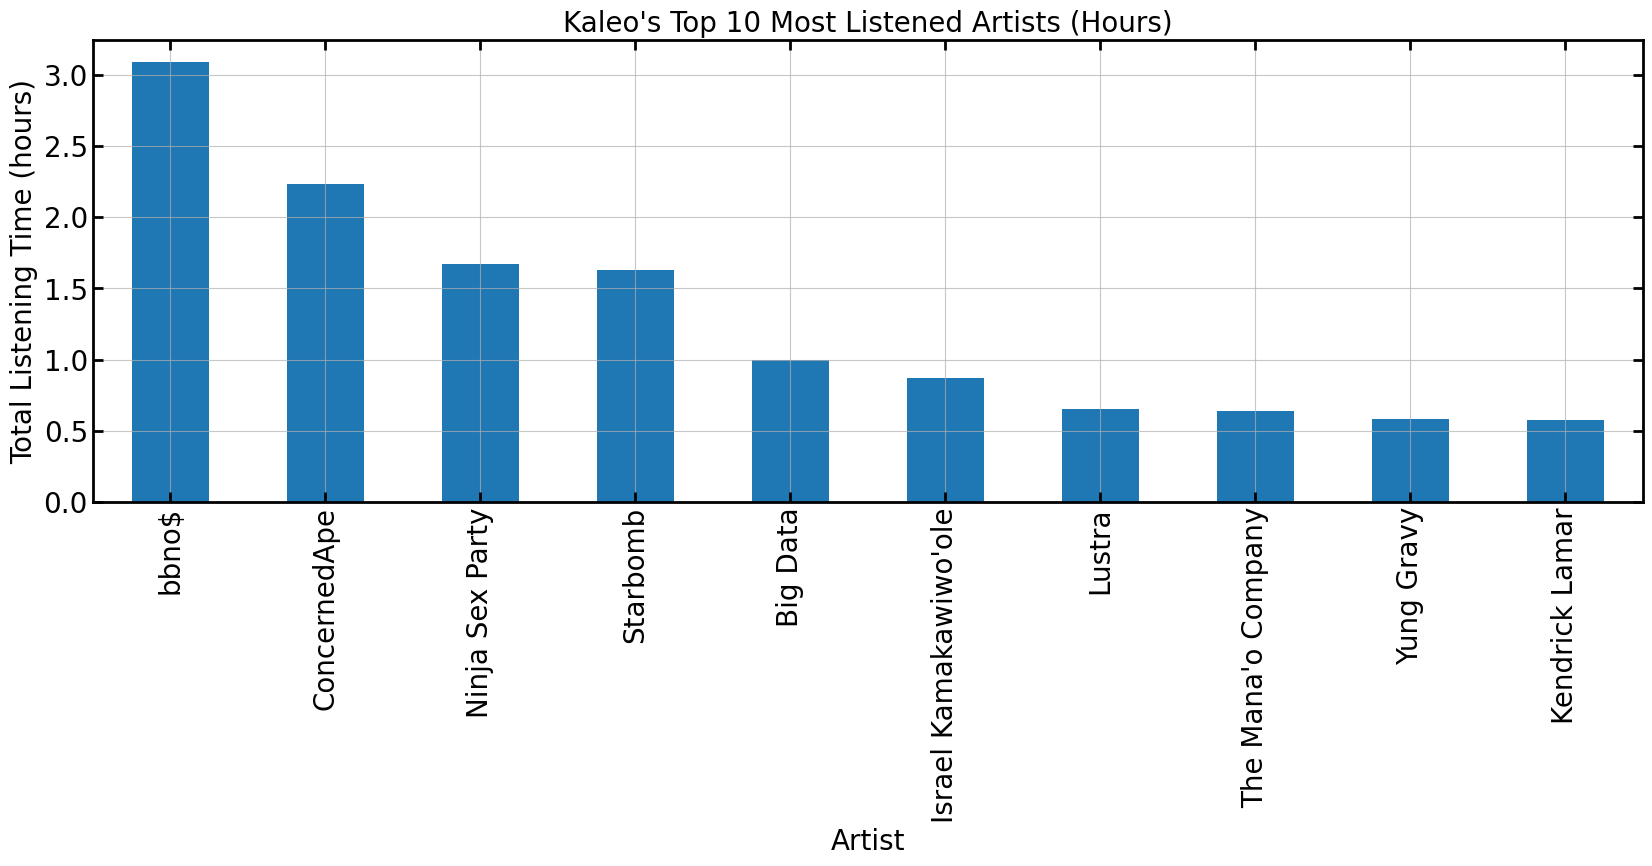

In [ ]:
#Time to plot!
#The warnings are from me having non-English artists, and Matplotlib apparently does not like having to read this
plt.figure(figsize=(20, 6))

top10Artists.plot(kind='bar');

plt.xlabel("Artist")
plt.ylabel("Total Listening Time (hours)")
plt.title("Kaleo's Top 10 Most Listened Artists (Hours)", fontsize=20)

plt.grid(True, alpha=0.7)
plt.show()

We can confirm that my top artist was BBNO$ with a total of ~3.1 hours of total listening time. Followed by ConcernedApe (the creator of Stardew Valley) with ~2.2 hours, and Ninja Sex Party (that started off as an improv duo) with ~1.8 hours.

Now to answer which song I listened to the most, and which to the least.

In [ ]:
#Use .groupby() again!
songTotal = nonzeroSongs.groupby(['artistName', 'trackName'])['hoursPlayed'].sum().sort_values(ascending=False)

mostPlayed = songTotal.idxmax() #Grab the max from .groupby series
leastPlayed = songTotal.idxmin() #Grab the min from .goupby series

print("My most listened to song was", mostPlayed)
print("My least listened to song was", leastPlayed)

My most listened to song was ('Big Data', 'Dangerous')
My least listened to song was ('Yugo Kanno', 'Yuki')


Last question: how did my time listening to my top artist change over time? We found that my top artist was BBNO$. So we need to make a new data frame for just BBNO(money), grab the date as a datetime object, then groupby() for hours played.

In [ ]:
#Making a copy of the dataframe under the boolean mask where we only select BBNO$
bbno = nonzeroSongs[nonzeroSongs["artistName"]=='bbno$'].copy()

In [ ]:
bbno["endTime"] = pd.to_datetime(bbno["endTime"]) #creating a datetime object

bbno["date"] = bbno["endTime"].dt.date #extracting date

bbno_daily = bbno.groupby('date')['hoursPlayed'].sum() #then summing by each day how many hours I listened to BBNO$ songs

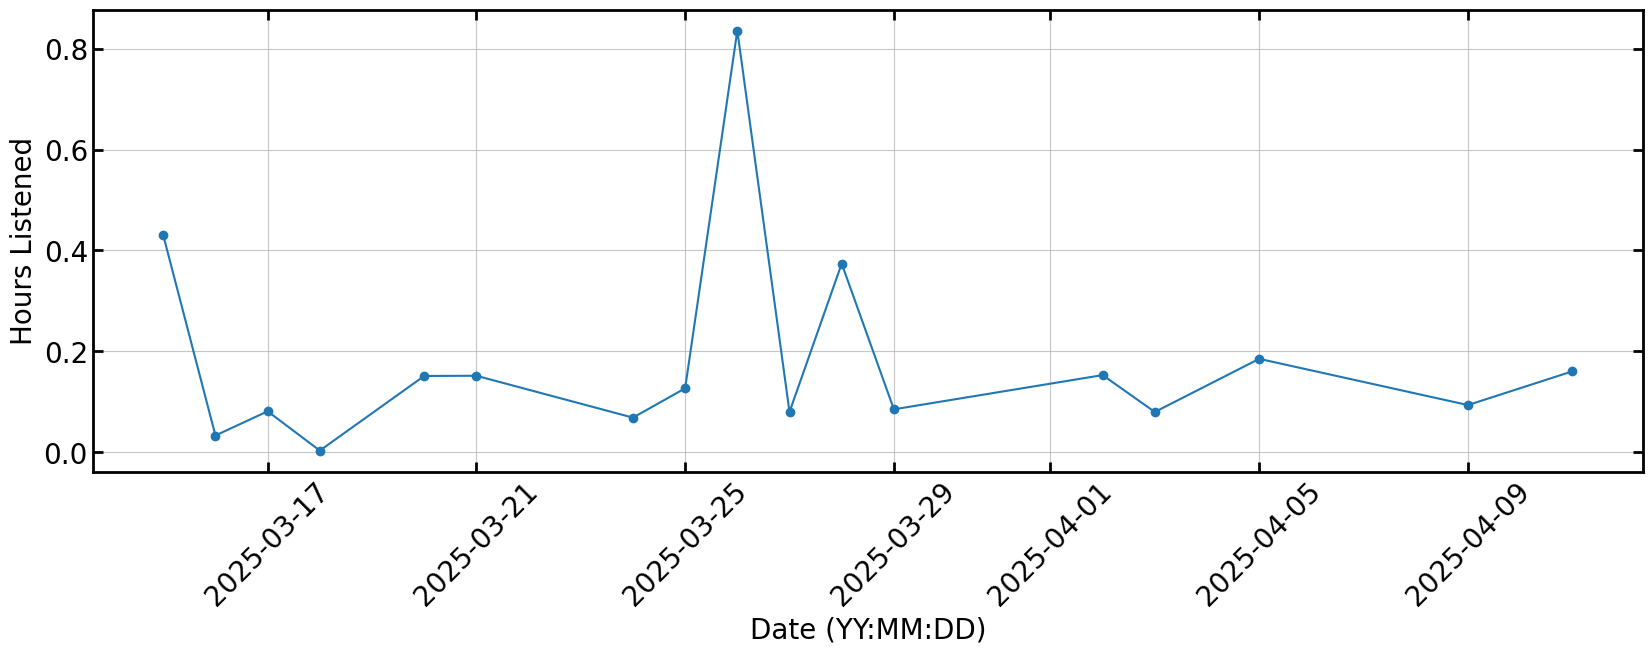

In [ ]:
#Time to plot!
plt.figure(figsize=(20, 6))
bbno_daily.plot(marker='o', linestyle='-')

plt.xlabel("Date (YY:MM:DD)")
plt.xticks(rotation=45)
plt.ylabel("Hours Listened")

plt.grid(True, alpha=0.7)

Cool! We can see that I on average listen to BBNO$ for ~0.1 hours, but there was a huge spike on what looks like the 26th of March where I listened to almost a full hour of his songs.

## Part 4: Analyze and visualize an additional element from  your personal data (Catelyn)

### **Goal**: I want to determine how often I interacted with my Google account and the most common types of interactions that cause Google to store my IP address.

### 1) Create the activity dataframe.

In [ ]:
# I will be working with 'table' once again (which contains all the values stored in my IP address table)
#The columns I am interested in are 'Activity Type' and 'Interactive'.

#The 'Activity Type' column's values can be found starting at index 2 and indexes increasing by increments of 8
print(table[2])
print(table[10])
print(table[18])
print(table[26])
print(table[34])

#The 'Interactive' column's values can be found starting at index 3 and indexes increasing by increments of 8
print(table[3])
print(table[11])
print(table[19])
print(table[27])
print(table[35])

In [ ]:
# I will create two lists to store the values for my columns of interest
activities = [table[i].text for i in range(2, len(table), 8)]
is_interactive = [table[i].text for i in range(3, len(table), 8)]

#Both columns have the same number of values
print(activities)
print(len(activities))
print(is_interactive)
print(len(is_interactive))

In [ ]:
#Now I will turn these lists into a dataframe

df4 = pd.DataFrame({'activity': activities, 'is_interactive' : is_interactive})
print(df4.head())
print(df4.tail())

## 2) Determine how often I directly interact with my Google account

In [ ]:
#I will separate df4 into two separate dataframes: One dataframe contains events where I directly interacted with my Google account
# while the other contains events where my IP address was collected when I was not interacting directly with my account.

interactive_activity = df4[df4['is_interactive'] == 'true']
noninteractive_activity = df4[df4['is_interactive'] == 'false']

In [ ]:
# There are 110 instances where I interacted with my Google account and my IP address was collected.
print(interactive_activity.head())
print(len(interactive_activity))

In [ ]:
# There are 71 instances where I did not directly interact with my Google account and my IP address was collected.
print(noninteractive_activity.head())
print(len(noninteractive_activity))

In [ ]:
# I want to determine the percentage of IP address collection due to direct interaction with my Google account.
(len(interactive_activity) / len(df4)) * 100

# I will also determine the percentage of IP address collection that occurs without me directly interacting with my Google account.
(len(noninteractive_activity) / len(df4)) * 100

### **Conclusion**:  60.78% of the time, Google tracks my IP address when I am directly interacting with my Google account.  Also, I only logged in or out of my account 110 times during the past 8 months.  This low number of interactions may be explained by my more frequent use of my school account.

## 3) Compare the most common interactive vs non-interactive activities using bar charts.

In [ ]:
#Count the occurence of each interactive activity that caused my Google account to collect my IP address
interactive_activity_counts = interactive_activity.groupby(interactive_activity['activity'])['activity'].count()
print(interactive_activity_counts)

#Find the percentage of each different activity so I can compare the percentages to the non-interactive activities' percentages.
interactive_percents = (interactive_activity_counts / len(interactive_activity)) * 100
print(interactive_percents)


In [ ]:
#Count the occurence of each non-interactive activity that caused my Google account to collect my IP address
noninteractive_activity_counts = noninteractive_activity.groupby(noninteractive_activity['activity'])['activity'].count()
print(noninteractive_activity_counts)

#Find the percentage of each different activity so I can compare the percentages to the interactive activities' percentages.
noninteractive_percents = (noninteractive_activity_counts / len(noninteractive_activity)) * 100
print(noninteractive_percents)

In [ ]:
# Create a bar chart for the interactive activity percentages
plt.figure(figsize=(12, 6))
sns.barplot(x=interactive_percents.keys(), y=interactive_percents)

plt.xlabel('Activity')
plt.ylabel('Percent')
plt.title('Percentage of interactive activities where Google collected my IP address')
plt.show()

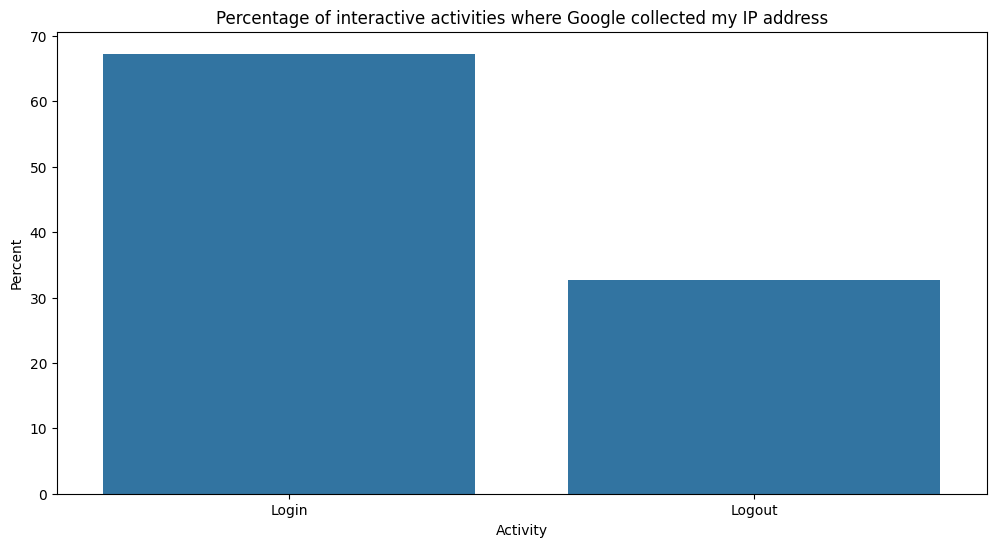

In [ ]:
# Create a bar chart for the non-interactive activity percentages
plt.figure(figsize=(12, 6))
sns.barplot(x=noninteractive_percents.keys(), y=noninteractive_percents)
plt.xlabel('Activity')
plt.ylabel('Percent')
plt.title('Percentage of non-interactive activities where Google collected my IP address')
plt.show()

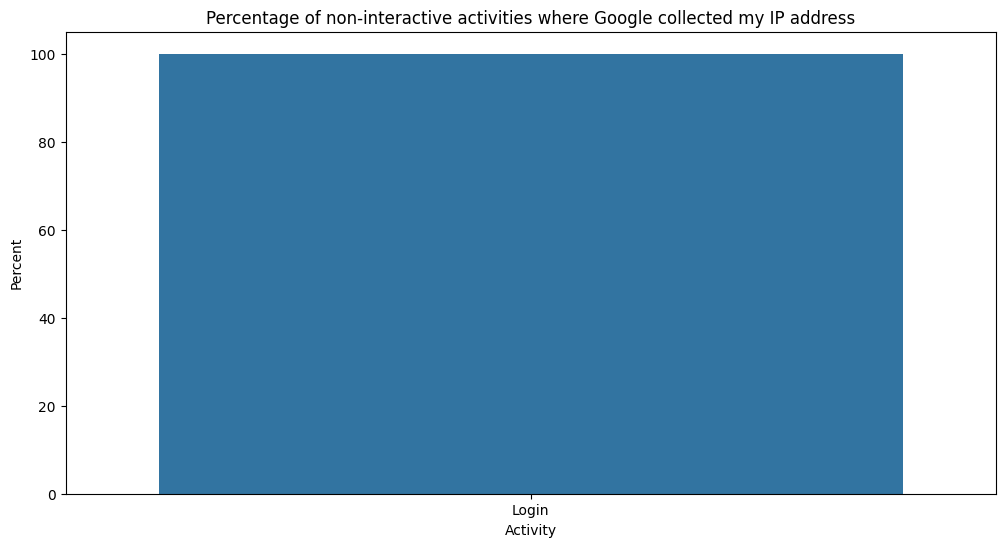

### **Conclusion**:  Whether or not I directly interact with my Google account, Google collects my IP address more often when I log in to my account.  Also, it appears that Google will never log me out of my account unless I ask it to.

***